In [ ]:
import pandas as pd

# Source https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925
'''
Loading Gensim and nltk libraries
'''
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_7.csv')

In [ ]:
data.columns

Index(['created_utc', 'id', 'is_nsfw', 'media', 'subreddit', 'subscribers',
       'thumbnail.height', 'thumbnail.thumbnail', 'thumbnail.width', 'title',
       'ups', 'text_from_meme', 'text_words', 'processed_words', 'url',
       'upvote ratio', 'dank_level', 'Time_of_day', 'stop_words', 'word_count',
       'char_count'],
      dtype='object')

In [ ]:
data['Text'] = 'Empty'
data['Sentiment'] = 0.0
for ind in tqdm(data.index):
    words = data['processed_words'][ind]
    memetext = (''.join(word.replace("'","") for word in words[1:].split(',')))[:-1]
    data['Text'][ind] = memetext
    memetext = memetext[:0]

100%|██████████| 30000/30000 [00:07<00:00, 4168.74it/s]


In [ ]:
data.Text

0        invest mudders credit card meetin purchase hsi...
1                                    invest security mucch
2        invest jontron slice price half bargain sure g...
3                                      invest elmo vietnam
4                                      invest woman statue
                               ...                        
29995                amltheasshole users fact asshole fuck
29996    powerful hahaha gamer innocent beat_ esports b...
29997    brit scar invade counter aspirin america count...
29998                   take joke seriously start argument
29999        like freshman week break covid junior mematic
Name: Text, Length: 30000, dtype: object

In [ ]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
LSTM_model = load_model('/content/drive/MyDrive/best_model.hdf5')
# summarize model.
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 56, 100)           40000100  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 40,371,310
Trainable params: 371,210
Non-trainable params: 40,000,100
_________________________________________________________________


In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
import json
word_idx = json.load(open("/content/drive/MyDrive/Data_word_idx.txt"))

In [ ]:
def live_analyses(trained_model, data, word_idx):
    live_list = []
    live_list_np = np.zeros((56,1))
    # split the sentence into its words and remove any punctuations.
    tokenizer = RegexpTokenizer(r'\w+')
    data_sample_list = tokenizer.tokenize(data)
    labels = np.array(['1','2','3','4','5','6','7','8','9','10'], dtype = "int")
    # get index for the live stage
    data_index = np.array([word_idx[word.lower()] if word.lower() in word_idx else 0 for word in data_sample_list])
    data_index_np = np.array(data_index)
    # padded with zeros of length 56 i.e maximum length
    padded_array = np.zeros(56)
    padded_array[:data_index_np.shape[0]] = data_index_np
    data_index_np_pad = padded_array.astype(int)
    live_list.append(data_index_np_pad)
    live_list_np = np.asarray(live_list)
    # get score from the model
    score = trained_model.predict(live_list_np, batch_size=1, verbose=0)
    single_score = np.round(np.argmax(score)/10, decimals=2) # maximum of the array i.e single band
    # weighted score of top 3 bands
    top_3_index = np.argsort(score)[0][-3:]
    top_3_scores = score[0][top_3_index]
    top_3_weights = top_3_scores/np.sum(top_3_scores)
    single_score_dot = np.round(np.dot(top_3_index, top_3_weights)/10, decimals = 2)
    return single_score_dot, single_score

In [ ]:
for ind in tqdm(data.index):
    text = data['Text'][ind][:250]
    result = np.array(live_analyses(LSTM_model,text, word_idx))[0]
    data['Sentiment'][ind] = result

100%|██████████| 30000/30000 [29:03<00:00, 17.21it/s]


In [ ]:
list(data)

['created_utc',
 'id',
 'is_nsfw',
 'media',
 'subreddit',
 'subscribers',
 'thumbnail.height',
 'thumbnail.thumbnail',
 'thumbnail.width',
 'title',
 'ups',
 'text_from_meme',
 'text_words',
 'processed_words',
 'Text',
 'url',
 'upvote ratio',
 'dank_level',
 'Time_of_day',
 'stop_words',
 'word_count',
 'char_count',
 'Sentiment']

In [ ]:
data = data.drop(['stop_words','word_count','char_count','text_from_meme'],axis=1)

In [ ]:
list(data)

['created_utc',
 'id',
 'is_nsfw',
 'media',
 'subreddit',
 'subscribers',
 'thumbnail.height',
 'thumbnail.thumbnail',
 'thumbnail.width',
 'title',
 'ups',
 'text_words',
 'processed_words',
 'Text',
 'url',
 'upvote ratio',
 'dank_level',
 'Time_of_day',
 'Sentiment']

In [ ]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,invest mudders credit card meetin purchase hsi...,10
1,invest security mucch,3
2,invest jontron slice price half bargain sure g...,13
3,invest elmo vietnam,3
4,invest woman statue,3


In [ ]:
data['char_count'] = data['text_words'].str.len() ## this also includes spaces
data[['text_words','char_count']].head()

,text_words,char_count
0,Invest in ye mudders credit card {E || V] C ME...,101
1,Invest in bio-security Mucch,28
2,INVEST in Jontron slicing the price in half! A...,135
3,Invest in Elmo in Vietnam,26
4,Invest in woman with her statue,32


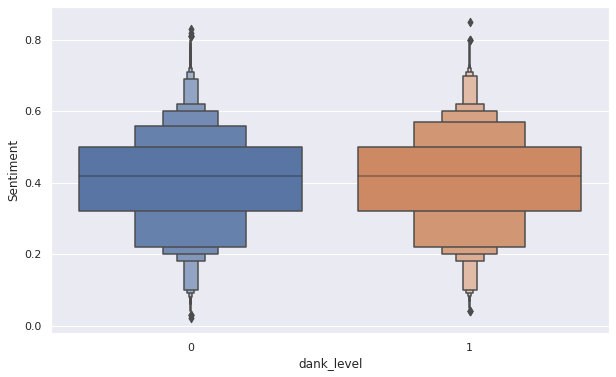

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='dank_level', y='Sentiment', data=data)
plt.show()

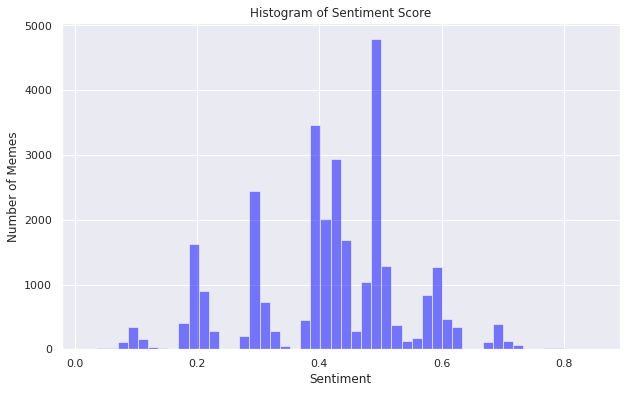

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data.Sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Number of Memes')
plt.title('Histogram of Sentiment Score')
plt.show()

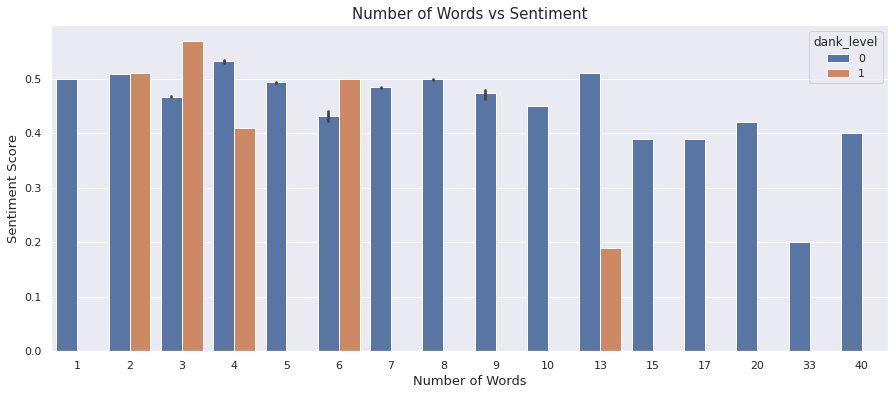

In [ ]:
df_sub= data.loc[data.word_count //2*2]
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='Sentiment', hue='dank_level', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Sentiment Score', fontsize=13)
plt.title('Number of Words vs Sentiment', fontsize=15)
plt.show()

In [ ]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/Sentiment_data.csv',index=False)